In [61]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [62]:
#load dataset
dataFrame = pd.read_csv("iris.csv")
dataFrame.head(5)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
dataFrame.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [64]:
dataFrame.isna().values.any()
print(dataFrame.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
Species          object
dtype: object


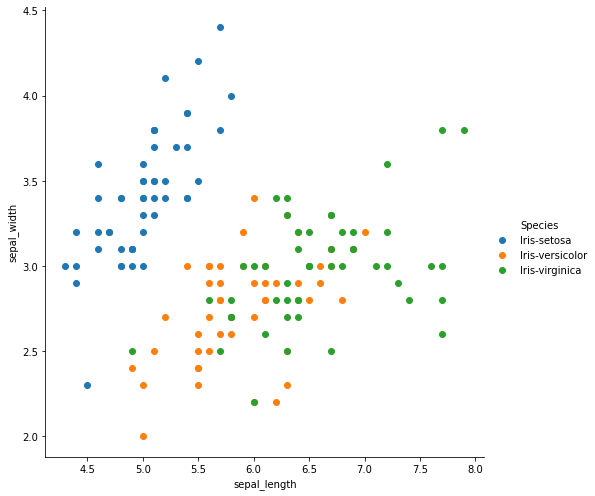

In [65]:
sns.FacetGrid(dataFrame, hue="Species", height=7) \
.map(plt.scatter, "sepal_length", "sepal_width") \
.add_legend()

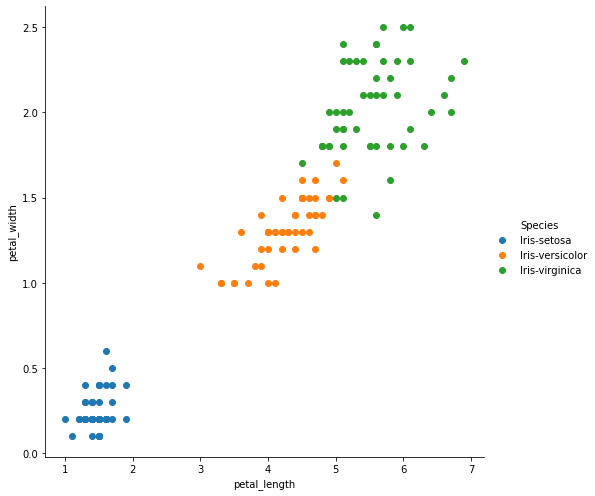

In [67]:
sns.FacetGrid(dataFrame, hue='Species', height=7) \
.map(plt.scatter, "petal_length", "petal_width") \
.add_legend()

In [68]:
X = dataFrame.iloc[:,:-1]
Y = dataFrame.iloc[:,-1]

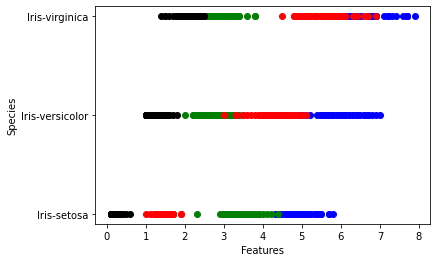

In [76]:
plt.xlabel("Features")
plt.ylabel("Species")

pltX = dataFrame.loc[:, "sepal_length"]
pltY = dataFrame.loc[:, "Species"]
plt.scatter(pltX, pltY, color="blue", label="sepal_length")

pltX = dataFrame.loc[:, "sepal_width"]
pltY = dataFrame.loc[:, "Species"]
plt.scatter(pltX, pltY, color="green", label="sepal_width")

pltX = dataFrame.loc[:, "petal_length"]
pltY = dataFrame.loc[:, "Species"]
plt.scatter(pltX, pltY, color="red", label="petal_length")

pltX = dataFrame.loc[:, "petal_width"]
pltY = dataFrame.loc[:, "Species"]
plt.scatter(pltX, pltY, color="black", label="petal_width")

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [89]:
#train the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [90]:
y_pred = model.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']


In [91]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

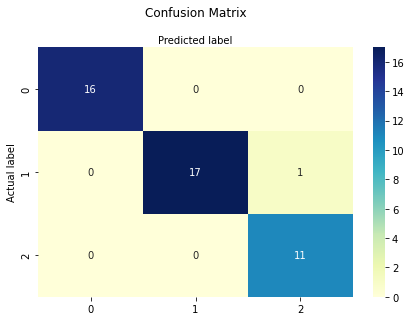

In [92]:
class_names=[0, 1] #names of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [98]:
print(classification_report(y_test, y_pred))
print("accuracy: ", accuracy_score(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

accuracy:  0.9777777777777777
